Explain the Nature of the Project

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.datasets import make_s_curve
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



Explain the GSS

In [115]:
#Bring in the dataset
##Ad a second index column for locating the missing values
gss=pd.read_csv("GSS_1996.csv", encoding="latin1")
gss['index_found'] = gss.index
gss.head()

,found,occ10,occindv,occstatus,occtag,prestg10,prestg105plus,indus10,indstatus,indtag,...,old10,old13,relate10,relate13,relhhd10,relhhd13,where11,where6,death,index_found
0,not foun,retail s,IAP,not foun,not foun,31,18,hardware,not foun,not foun,...,IAP,IAP,IAP,IAP,IAP,IAP,IAP,IAP,possibly,0
1,found,retail s,verbatim,"found, c",found,31,18,clothing,"found, c",found,...,IAP,IAP,IAP,IAP,IAP,IAP,IAP,IAP,possibly,1
2,found,pipelaye,verbatim,"found, c",found,43,50,petroleu,"found, c",found,...,IAP,IAP,IAP,IAP,IAP,IAP,IAP,IAP,possibly,2
3,found,preschoo,verbatim,"found, c",found,53,68,child da,"found, c",found,...,IAP,IAP,IAP,IAP,IAP,IAP,IAP,IAP,possibly,3
4,found,sewing m,verbatim,"found, c",found,32,22,cut and,"found, c",found,...,IAP,IAP,IAP,IAP,IAP,IAP,IAP,IAP,possibly,4


Explain how the data needs to be cleaned, including:
1. getting rid of missing on the dv
2.of which some are because they werent asked bcause couldn't recall angry event.
3. how each variable needs to be recoded

In [4]:
#Clean the data
##drop cases with no answer, not asked, and don't know on the DV
badanswers=["NA","IAP","DK"]
for answer in badanswers:
    dropindex = gss[ (gss['chnang7'] == answer)].index
    gss.drop(dropindex , inplace=True)
##drop cases with null values on the DV
gss=gss[gss["chnang7"].notna()]

In [5]:
gss["chnang7"].unique()

array(['didnt', 'did'], dtype=object)

In [6]:
#Make DV a dummy variable called pray_anger
pray_anger=[]
for answer in gss["chnang7"]:
    if answer=="didnt":
        pray_anger.append(0)
    elif answer=="did":
        pray_anger.append(1)
    else:
        print("Value Error: Please recode data to omit all values that are not 'did' or 'didn't'")

In [7]:
#Reshape the DV for sklearn
DVpray_anger=np.array(pray_anger)
DVpray_anger.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [84]:
#Create Dataframe to Catch Missing Values
##create database, starting with missing values on marital status
missing=gss.loc[(gss['marital'].isnull()), ['index_found', "marital"]]
missing["variable"]="marital"
##add missing values on education
missing_e=gss.loc[(gss['degree']==".a"), ['index_found', "degree"]]
missing_e
missing.append(missing_e)
##add missing values on sex

,Variable,Row


In [138]:
missing=gss.loc[(gss['marital'].isnull()), ['index_found', "marital"]]
missing["variable"]="marital"

missing_e=gss.loc[(gss['degree']==".a"), ['index_found', "degree"]]
missing_e
missing.append(missing_e)


,index_found,marital,variable,degree
684,684,NaN,marital,NaN
455,455,NaN,NaN,.a
699,699,NaN,NaN,.a
1191,1191,NaN,NaN,.a
1301,1301,NaN,NaN,.a
2000,2000,NaN,NaN,.a
2574,2574,NaN,NaN,.a
2575,2575,NaN,NaN,.a


In [97]:
df_missing

,Variable,Row


In [ ]:
#################
#Recoding the IVs
#################

#Making Dummies... almost.
#We cannot recode dummy variables using the pandas get_dummies command because we want to preserve the missing data (coded .a) on each of the IVs. We are doing this so that we can multiple-impute them later. Instead, we will manually loop through the data and document the location of missing values in a new dataframe.

In [ ]:
##Sex (to dummy variable)

missingcounter=0
sex=[]
for answer in gss["sex"]:
    missingcounter+=1
    if answer=="male":
        sex.append(0)
    elif answer=="female":
        sex.append(1)
    elif answer==".a":
        race.append(answer)
        print(f"missing value on sex at row {missingcounter}")
        df_missing=df_missing.append({"Variable": "sex", "Row": missingcounter}, ignore_index=True)
    else:
        print("Sex value error: {answer}.")

In [ ]:
##Race(To dummy variable)
missingcounter=0
race=[]
for answer in gss["race"]:
    missingcounter+=1
    if answer=="white":
        race.append(0)
    elif answer=="black" or answer=="other":
        race.append(1)
    elif answer==".a":
        race.append(answer)
        print(f"missing value on race at row {missingcounter}")
        df_missing=df_missing.append({"Variable": "race", "Row": missingcounter}, ignore_index=True)
    else:
        print("Race value error: {answer}.")
##Education(To dummy variable with having degree as reference category)
missingcounter=0

In [117]:

education=[]
for answer in gss["degree"]:
    missingcounter +=1
    if answer =="bachelor" or answer=="graduate":
        education.append(0)
    elif answer=="lt high" or answer =="high sch" or answer=="junior c":
        education.append(1)
    elif answer==".a":
        education.append(answer)
        print(f"missing value on education at row {missingcounter}")
        df_missing=df_missing.append({"Variable": "education", "Row": missingcounter}, ignore_index=True)
    else:
        print(f"education value error: {answer}.")
missingcounter=0

missing value on education at row 456
missing value on education at row 700
missing value on education at row 1192
missing value on education at row 1302
missing value on education at row 2001
missing value on education at row 2575
missing value on education at row 2576


In [ ]:
education_missing=gss.loc[(gss['degree'].isnull()), ['index_found']]
education_missing.append(gss.loc[(gss['degree'].isnull()), ['index_found']]
marital_missing["marital"]="marital"
marital_missing

marital_missing=gss.loc[(gss['marital'].isnull()), ['index_found']]
marital_missing["marital"]="marital"
marital_missing

marital_missing["marital"]="marital"
marital_missing

marital_missing=gss.loc[(gss['marital'].isnull()), ['index_found']]
marital_missing["marital"]="marital"
marital_missing


In [72]:
##Region(To dummy variable with not being from the south as a reference category)
##Note: the original study used "region of interview", but "region of residence" is a better indicator, and will be used here.
reg16_southanswers=["south at", "e. sou.", "w. sou."]
reg16_nonsouth=["foreign", "new engl", "middle a", "e. nor.", "w. nor.", "mountain", "pacific"]
missingcounter=0
south=[]

for answer in gss["reg16"]:
    missingcounter +=1
    if answer in reg16_southanswers:
        south.append(1)
    elif answer in reg16_nonsouth:
        education.append(1)
    elif answer==".a" or answer=="NaN":
        education.append(answer)
        print(f"missing value on reg16 at row {missingcounter}")
        df_missing=df_missing.append({"Variable": "region", "Row": missingcounter}, ignore_index=True)
    else:
        print(f"reg16 value error: {answer}.")
missingcounter=0



missing value on education at row 456
missing value on education at row 700
missing value on education at row 1192
missing value on education at row 1302
missing value on education at row 2001
missing value on education at row 2575
missing value on education at row 2576


,index1,marital
684,684,NaN


In [73]:
#Recoding marital status (To dummy varaible with non-married as the reference category)
reg16_nonmarried=["never ma", "divorced", "separate", "widowed"]

missingcounter=0
married=[]

for answer in gss["marital"]:
    missingcounter +=1
    if answer== "married":
        married.append(1)
    elif answer in reg16_nonmarried:
        married.append(0)
    elif answer==".a" or answer=="NaN":
        married.append(answer)
        print(f"missing value on reg16 at row {missingcounter}")
        df_missing=df_missing.append({"Variable": "married", "Row": missingcounter}, ignore_index=True)
    else:
        missing_value=gss[gss["marital"]==answer].index.values
        print(f"married value error {answer}.")
missingcounter=0

married value error nan.


In [74]:
list = gss.index[gss['marital'] == "nan "].tolist()

In [65]:
gss.loc[(gss['Index1'])

KeyError: 'Index1'

In [71]:

gss.loc[(gss['index1'] ==684), ['index1', 'marital']] 

,index1,marital
684,684,NaN


In [28]:
for item in gss:
    if item=="married":
        print(gss[gss["marital"]==item].index.values)

In [371]:
#HOW TO: reshape variables
x = np.array(sex).reshape(-1, 1)
y = np.array(pray_anger).reshape(-1, 1)

print("Shape: ", x.shape, y.shape)

Shape:  (1114, 1) (1114, 1)


In [372]:
#HOW TO: estimate model
from sklearn.linear_model import LogisticRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(x, y)

score = model.score(x, y)
print(f"R2 Score: {score}")

R2 Score: 0.02818222827970518


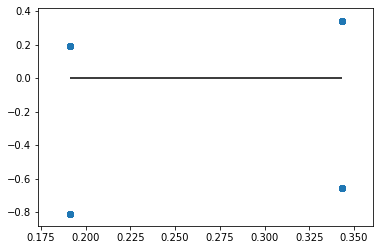

In [373]:
#HOW TO: plot residuals
predictions = model.predict(x)
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

array([[0.19117647],
       [0.34326019],
       [0.34326019],
       ...,
       [0.34326019],
       [0.19117647],
       [0.19117647]])